In [187]:
#import Direct_Strapdown as ds   # Functions libary
%load_ext autoreload
%autoreload 2
from src import Direct_Strapdown as ds
from src import IMU_load
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.io as spio
from scipy import interpolate
from dataclasses import dataclass
import math
params = {'axes.labelsize': 'x-large', 'axes.titlesize':'xx-large','xtick.labelsize':'large', 'ytick.labelsize':'large', 'legend.fontsize': 'x-large','mathtext.fontset':'stix', 'font.family':'STIXGeneral'}
plt.rcParams.update(params)
from pathlib import Path
import pyproj
from pyproj import Transformer

# Set GNSS antenna -> IMU lever arm 
lever_arm = np.array([-0.343, -0.323, -0.653])
# Set filter time coefficient 
ftc = 120
freq = 1
#ftc = 300

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [188]:

file1 = Path("..", "data_DK2022_new", "data", "ROSKILDE16", "116_air1_inat.txt")
file2 = Path("..", "data_DK2022_new", "data", "ROSKILDE16",  "116_air1_ppp_2Hz.txt")
file3 = Path("..", "data_DK2022_new", "data", "ROSKILDE16",  "116_inat.dat")
file4 = Path("..", "data", "AllFreeAir.dat")

nav = IMU_load.load_nav(file1)
gnss = IMU_load.load_gnss(file2)

gnss = gnss.iloc[::2].reset_index(drop=True) # A test

# imu = IMU_load.readIMAR(file3, "echo", "on")
freeAir = pd.read_csv(file4.as_posix(), delim_whitespace=True, header=None, names = ["id", "lat", "lon", "H", "FA", "std_dev"])

file = 'Coastline_val.txt'
coast = pd.read_table(file, sep = ",")


file5 = Path("..", "data_DK2022_new", "data", "derived_data", "116_imar.mat")
data = spio.loadmat(file5, struct_as_record=False, squeeze_me=True)
imu = data['imu']
bacc = np.array(imu.bacc)
df = pd.DataFrame({
    'time': imu.time,
    'bacc1': bacc[:,0],
    'bacc2': bacc[:,1],
    'bacc3': bacc[:,2]
})

imu = df


Reading NAV datafile:  ..\data_DK2022_new\data\ROSKILDE16\116_air1_inat.txt
Reading GNSS datafile:  ..\data_DK2022_new\data\ROSKILDE16\116_air1_ppp_2Hz.txt


In [189]:
file285 = Path("..", "data", "data_new", "DK2022", "285_rqh2_ppp_1Hz.txt")
gnss_285 = IMU_load.load_gnss(file285)

Reading GNSS datafile:  ..\data\data_new\DK2022\285_rqh2_ppp_1Hz.txt


In [190]:
# print("Interpolating IMU Accelerations")
# for key, value in nav.items(): 
#     imu[key] = ds.interpolate_DS(nav.time, value, 
#                                         imu.time, "linear", False, "extrapolate")
# print("> Done")

# nav_but = {}
# print("Interpolating IMU Accelerations")
# for key, value in nav.items(): 
#     nav_but[key] = ds.but2_v2(value.values, 3, ftc, 1)
# print("> Done")

In [191]:
fors = [10.584149, 55.427809, 0]


In [192]:
# coast2 = pd.DataFrame({"lon":coast.X, "lat":coast.Y})
# land = pd.concat([coast2, pd.DataFrame({'lon': [0], 'lat': [0]})])
# # Fill the land area with a color

# fig, ax = plt.subplots(figsize=(6,7))
# ax.set_facecolor('lightblue')
# plt.plot(coast.X, coast.Y, color="black", linewidth=1)
# plt.plot(gnss_285.lon, gnss_285.lat, label="FlightID 285", linewidth=2)
# plt.plot(gnss.lon, gnss.lat, label="FlightID 116", linewidth=2)
# plt.scatter(fors[0], fors[1], 50, color="red", zorder=10, label = "Reference point")
# plt.scatter(gnss.lon[0], gnss.lat[0], 50, label="Start/End", marker='^', zorder=10, color="red")
# plt.fill(land['lon'], land['lat'], color='green')

# plt.legend(loc = "upper right", fontsize = 12)
# plt.grid()
# plt.xlabel(r'Longitude [$^{\circ}$]', fontsize = 16)
# plt.ylabel(r'Latitude [$^{\circ}$]', fontsize = 16)
# plt.xlim(7, 13)
# plt.ylim(54.5, 58.5)
# plt.title("Case Study Flight Paths", fontsize=20, pad = 20)
# name = Path("Figures", "Case_map.pdf")
# plt.savefig(name)

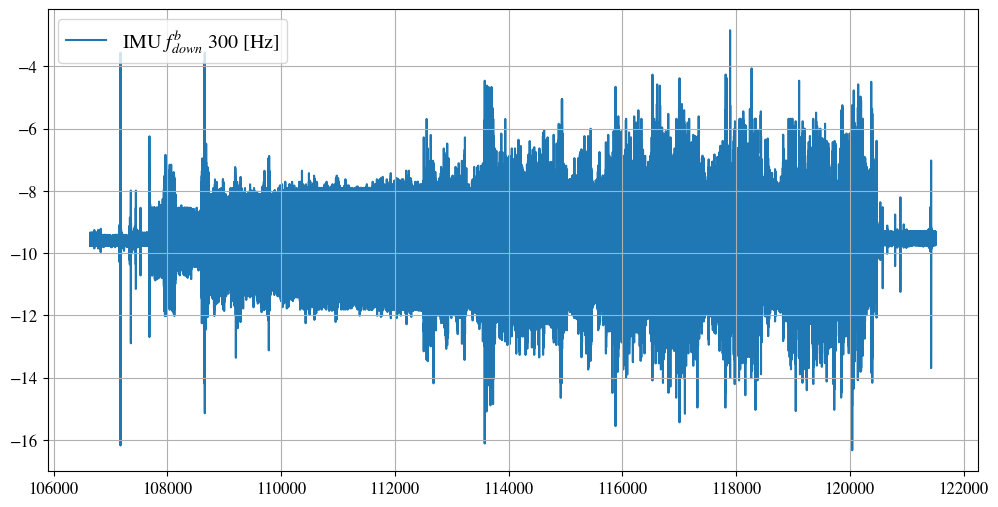

In [193]:
N = 6
fig = plt.figure(figsize=(N*2, N))

# plt.plot(imu_mov_mean_time, imu_mov_mean, label=r"IMU $f^b_{down}$ @ 2sek", zorder = 10)
plt.plot(imu.time.values, imu.bacc3.values, label=r"IMU $f^b_{down}$ 300 [Hz]", zorder = 0)
plt.plot()
plt.legend(loc = "upper left")
plt.grid()

plt.show()

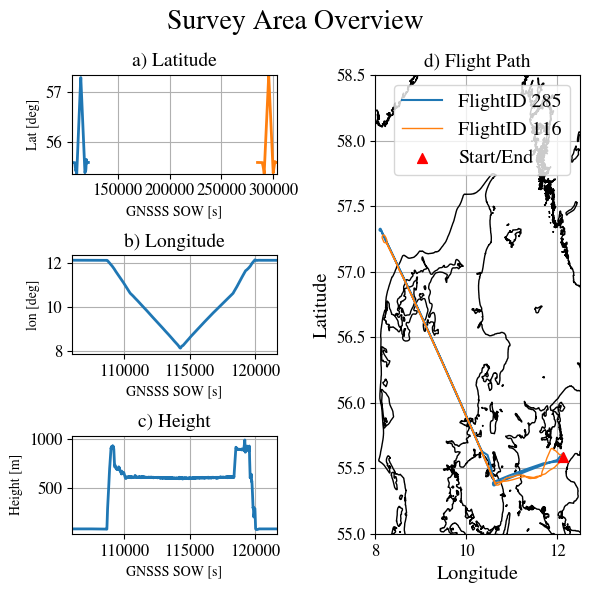

In [194]:
N = 6
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(N, N))
fig.suptitle("Survey Area Overview", fontsize= 20)
# create a grid with 3 rows and 2 columns
gs = gridspec.GridSpec(3, 2, figure=fig)

# add the first three subplots
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[2, 0])

# add the fourth subplot
ax4 = fig.add_subplot(gs[0:, 1])

#fig = plt.figure(figsize=figsize)
ax4.plot(coast.X, coast.Y, color="black", linewidth=1)
ax4.plot(gnss_285.lon, gnss_285.lat, label="FlightID 285")
ax4.plot(gnss.lon, gnss.lat, linewidth=1, label="FlightID 116")
ax4.scatter(gnss.lon[0], gnss.lat[0], 50, label="Start/End", marker='^', zorder=10, color="red")
ax4.legend(loc = "upper right")
ax4.grid()
ax4.set_xlabel('Longitude')
ax4.set_ylabel('Latitude')
ax4.set_title(r'Coastline')
ax4.set_xlim(8, 12.5);
ax4.set_ylim(55.0, 58.5);
ax4.set_title("d) Flight Path", fontsize=14)

ax1.plot(gnss.time, gnss.lat, linewidth=2)
ax1.plot(gnss_285.time, gnss_285.lat, linewidth=2)
ax1.grid()
ax1.set_xlabel('GNSSS SOW [s]', fontsize=10)
ax1.set_ylabel('Lat [deg]', fontsize=10)
ax1.set_xlim(gnss.time.values[0], gnss.time.values[-1]);
ax1.set_title("a) Latitude", fontsize=14)
ax1.autoscale(tight=True)

ax2.plot(gnss.time, gnss.lon, linewidth=2)
ax2.plot(gnss_285.time, gnss_285.lon, linewidth=2)
ax2.grid()
ax2.set_xlabel('GNSSS SOW [s]', fontsize=10)
ax2.set_ylabel('lon [deg]', fontsize=10)
ax2.set_xlim(gnss.time.values[0], gnss.time.values[-1]);
ax2.set_title("b) Longitude", fontsize=14)

ax3.plot(gnss.time, gnss.h, linewidth=2)
ax3.plot(gnss_285.time, gnss_285.h, linewidth=2)
ax3.grid()
ax3.set_xlabel('GNSSS SOW [s]', fontsize=10)
ax3.set_ylabel('Height [m]', fontsize=10)
ax3.set_xlim(gnss.time.values[0], gnss.time.values[-1]);
ax3.set_title("c) Height", fontsize=14)

plt.subplots_adjust(left=None, bottom=None, right=None, top=0.88, wspace=0.6, hspace=0.9)

plt.tight_layout()
plt.show()

In [195]:
ftc

120

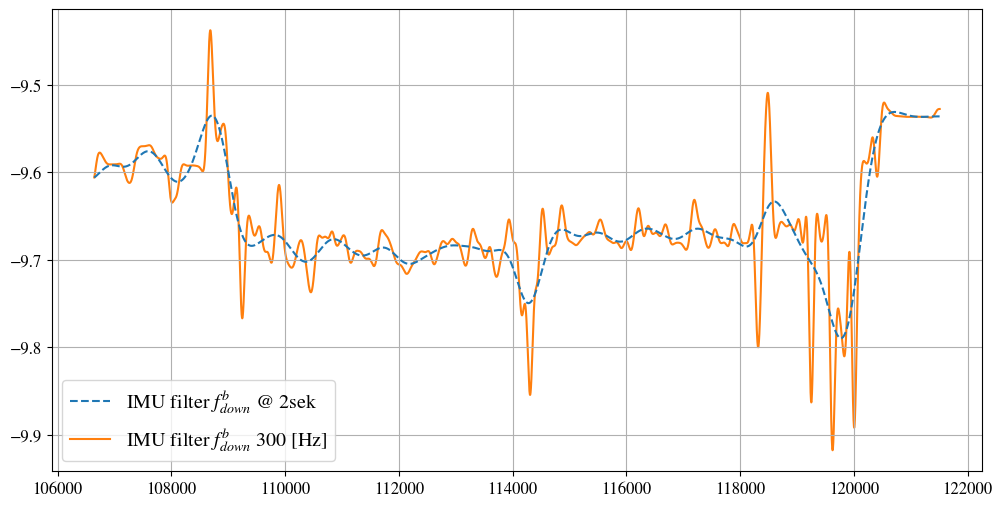

In [196]:
filter_size = 120
imu_mov_mean = ds.movmean(imu.bacc3.values, filter_size)
imu_mov_mean_time = ds.movmean(imu.time.values, filter_size)
imu_but_low = ds.but2_v2(imu_mov_mean, 3, 600, 1/300)
imu_but = ds.but2_v2(imu.bacc3.values, 3, ftc, 1/300)
fig = plt.figure(figsize=(N*2, N))

plt.plot(imu_mov_mean_time, imu_but_low, label=r"IMU filter $f^b_{down}$ @ 2sek", zorder = 10, linestyle="--")
plt.plot(imu.time.values, imu_but, label=r"IMU filter $f^b_{down}$ 300 [Hz]", zorder = 0)
plt.plot()
plt.legend(loc = "lower left")
plt.grid()

plt.show()

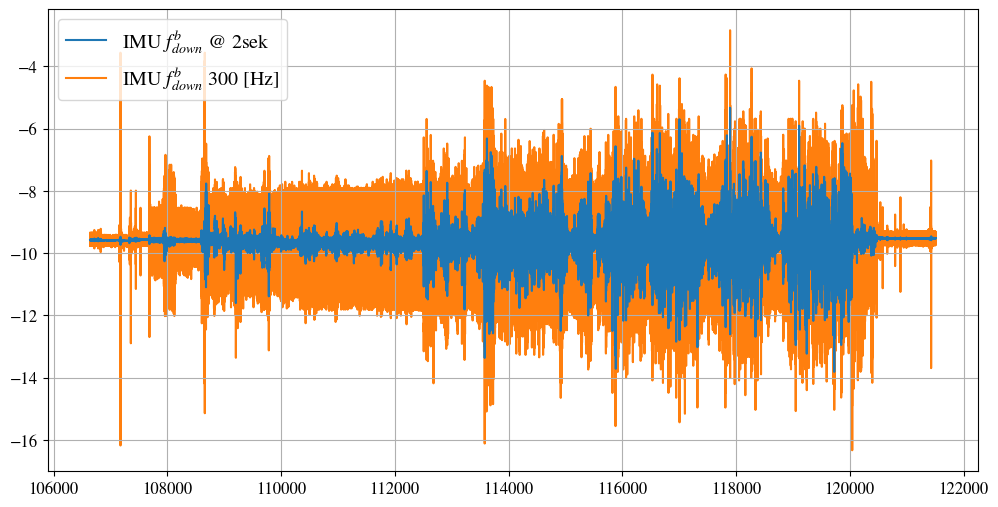

In [197]:
fig = plt.figure(figsize=(N*2, N))

plt.plot(imu_mov_mean_time, imu_mov_mean, label=r"IMU $f^b_{down}$ @ 2sek", zorder = 10)
plt.plot(imu.time.values, imu.bacc3.values, label=r"IMU $f^b_{down}$ 300 [Hz]", zorder = 0)
plt.plot()
plt.legend(loc = "upper left")
plt.grid()

plt.show()

In [198]:
freq

1

(110000.0, 118500.0)

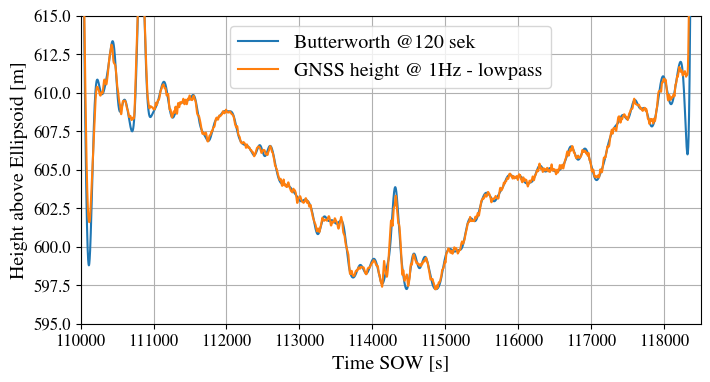

In [199]:
filtersize = 120
gnss_time_low = ds.movmean(gnss.time, filter_size)
gnss_h_low = ds.movmean(gnss.h, filter_size)

gnss_but = ds.but2_v2(gnss.h.values, 3, 120, freq)


fig = plt.figure(figsize=(8, 4))
# plt.plot(gnss.time, gnss.h, label="GNSS height @ 2Hz", zorder=1)
plt.plot(gnss.time, gnss_but, label="Butterworth @120 sek", zorder=5)
plt.plot(gnss_time_low, gnss_h_low, label="GNSS height @ 1Hz - lowpass", zorder=10)
plt.grid()
plt.legend(loc="upper center")
plt.xlabel("Time SOW [s]")
plt.ylabel("Height above Ellipsoid [m]")
plt.ylim(595, 615)
plt.xlim(110000, 118500)

In [200]:
# gnss_ = {}
# for key, value in gnss.items(): 
#     gnss_[key] = ds.movmean(value, filtersize)

# nav_ = {}
# for key, value in nav.items(): 
#     nav_[key] = ds.movmean(value, filtersize)
# gnss =  pd.DataFrame.from_dict(gnss_)
# nav = pd.DataFram
# e.from_dict(nav_)

In [201]:
print('Deriving accelerations from GNSS')

temp = {}
# Finite difference 

gnss_but = ds.but2_v2(gnss.h.values, 3, 120, freq)
# temp_gps_acc_raw, temp_time = ds.gnss_accelerations_v1(gnss.time.values, gnss.h,"difference")
temp_gps_acc_raw, temp_time = ds.gnss_accelerations_v1(gnss_time_low, gnss_h_low,"difference")
# temp_gps_acc_raw, temp_time = ds.gnss_accelerations_v1(gnss.time.values, gnss_but,"difference")

temp["gps_acc"] = temp_gps_acc_raw
temp["time"]  = temp_time

# Filter signals 
# temp_imu_acc = ds.but2_v2(imu.bacc3.values, 3, ftc, 1/300)
temp_imu_acc = ds.but2_v2(imu_mov_mean, 3, ftc, 1/300)
temp_gps_acc = ds.but2_v2(temp["gps_acc"], 3, ftc, freq)

temp["imu_acc"] = temp_imu_acc
temp["gps_acc"] = temp_gps_acc

# Interpolate 
#temp["imu_acc"] = ds.interpolate_DS(imu.time.values, temp["imu_acc"], temp["time"], "linear","extrapolate")
temp["imu_acc"] = ds.interpolate_DS(imu_mov_mean_time, temp["imu_acc"], temp["time"], "linear","extrapolate")

print("> Done")

Deriving accelerations from GNSS
> Done


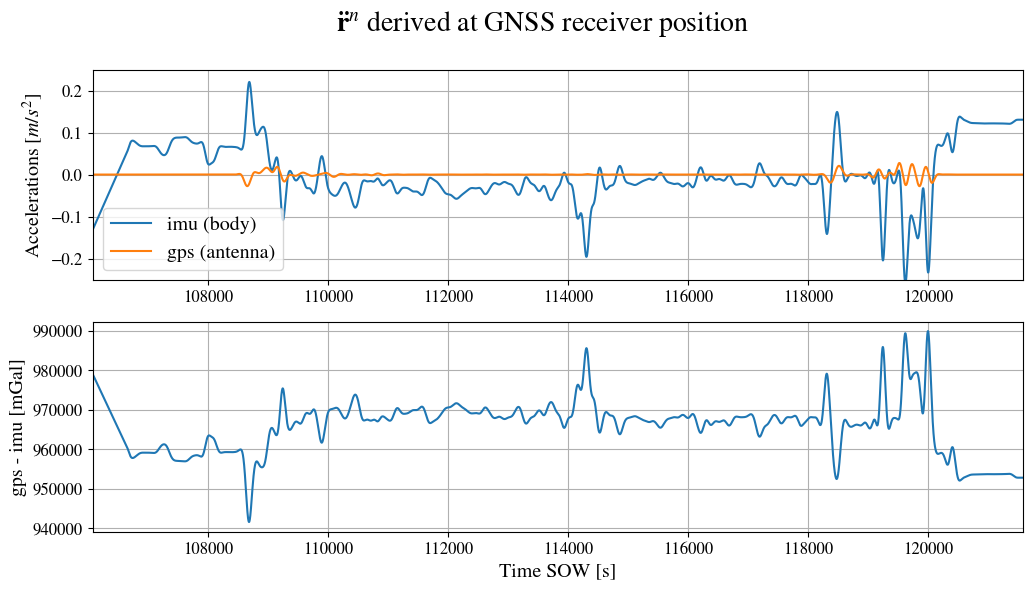

In [202]:
fig, ax = plt.subplots(2,1, figsize = (N*2,N))
ax[0].plot(temp["time"], temp["imu_acc"]-np.mean(temp["imu_acc"]), label="imu (body)")
ax[0].plot(temp["time"], temp["gps_acc"], label="gps (antenna)")
ax[0].set_xlim(temp["time"][0], temp["time"][-1])
# ax[0].set_ylim(-0.1, 0.1)
ax[0].set_ylabel(r"Accelerations [$m/s^{2}$]")
# ax[0].set_xlabel('Temp time SOW [s]')
ax[0].grid()
ax[0].legend(loc="lower left")
ax[0].set_ylim(-.25,0.25)

ax[1].plot(temp["time"], (temp["gps_acc"] - temp["imu_acc"])*10**5)
ax[1].grid()
ax[1].set_xlim(temp["time"][0], temp["time"][-1])
ax[1].set_ylabel("gps - imu [mGal]")
ax[1].set_xlabel('Time SOW [s]')
fig.suptitle(r"$\mathbf{\ddot{r}}^n$ derived at GNSS receiver position", fontsize=20)
plt.show()

In [203]:
gnss.lat

0        55.591357
1        55.591357
2        55.591357
3        55.591357
4        55.591357
           ...    
15628    55.593700
15629    55.593700
15630    55.593700
15631    55.593700
15632    55.593700
Name: lat, Length: 15633, dtype: float64

In [204]:
print("Translate GNSS Position to IMU Location")
nav_key = ["roll", "pitch", "yaw"]
for i in range(0, len(nav_key)): 
    gnss[nav_key[i]] = ds.interpolate_DS(nav.time, nav[nav_key[i]], gnss.time, "linear", "extrapolate")


olat, olon, oh = ds.pos_translate_v1(gnss.lat, gnss.lon, gnss.h, gnss.roll, gnss.pitch, gnss.yaw, lever_arm)
gnss["imu_lat"] = olat
gnss["imu_lon"] = olon
gnss["imu_h"] = oh

print("> Done")

Translate GNSS Position to IMU Location


100%|██████████| 15633/15633 [00:00<00:00, 19327.99it/s]

> Done


In [205]:
print("Deriving accelerations from IMU Location")

# Finite difference
# temp_gps_acc2, _= ds.gnss_accelerations_v1(gnss.time.values,gnss.imu_h, "difference")
# temp["gps_acc2"], index = ds.cutoff_bound(temp_gps_acc2)
# temp["gps_acc2"] = temp["gps_acc2"][:index]
# temp["time_cut"] = gnss.time[:index]
# temp["imu_acc_cut"] = temp["imu_acc"][:index]
temp_gps_acc2, _= ds.gnss_accelerations_v1(gnss_time_low, gnss_h_low, "difference")
temp["gps_acc2"], index = ds.cutoff_bound(temp_gps_acc2)
temp["time_cut"] = temp["time"][:index]
temp["imu_acc_cut"] = temp["imu_acc"][:index]


# temp["gps_acc2"] = temp_gps_acc2
# Filter signals  
temp_gps_acc2 = ds.but2_v2(temp["gps_acc2"], 3, ftc, freq)
temp["gps_acc2"] = temp_gps_acc2

print("> Done")

Deriving accelerations from IMU Location
The threshold value 0.001 was found at index 15511.
> Done


In [206]:
temp["gps_acc2"].shape
temp["time_cut"].shape
index

15511

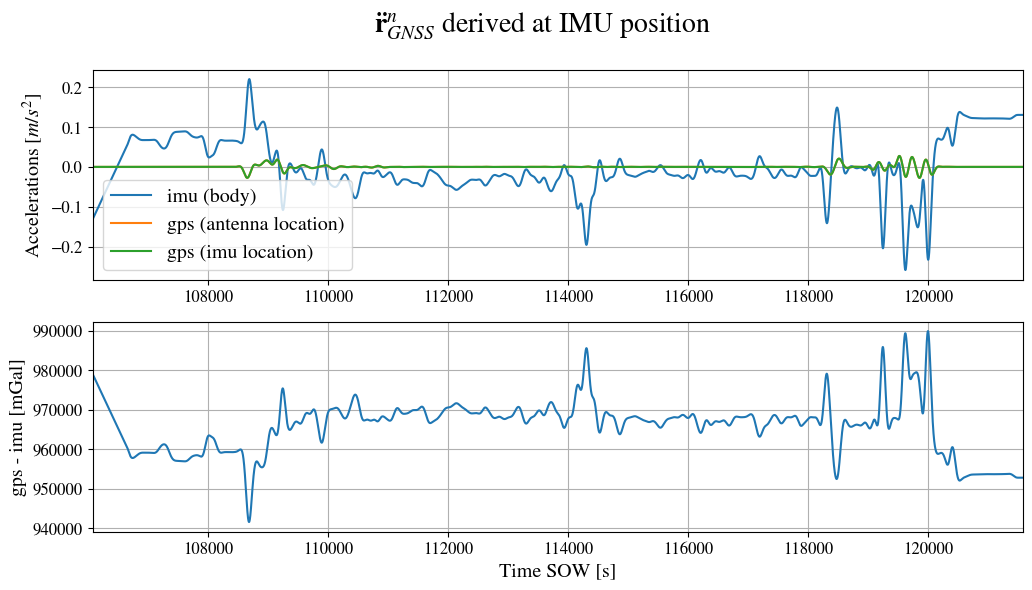

In [207]:
fig, ax = plt.subplots(2,1, figsize = (N*2,N))
ax[0].plot(temp["time"], temp["imu_acc"]-np.mean(temp["imu_acc"]), label="imu (body)")
ax[0].plot(temp["time"], temp["gps_acc"], label="gps (antenna location)")
ax[0].plot(temp["time_cut"], temp["gps_acc2"], label="gps (imu location)")
ax[0].set_xlim(temp["time"][0], temp["time"][-1])
# ax[0].set_ylim(-0.1, 0.1)
ax[0].set_ylabel(r"Accelerations [$m/s^{2}$]")
ax[0].grid()
ax[0].legend(loc = "lower left")

ax[1].plot(temp["time_cut"], (temp["gps_acc2"] - temp["imu_acc_cut"])*10**5)
ax[1].grid()
ax[1].set_xlim(temp["time_cut"][0], temp["time_cut"][-1])
ax[1].set_ylabel("gps - imu [mGal]")
ax[1].set_xlabel("Time SOW [s]")
fig.suptitle(r"$\mathbf{\ddot{r}}^n_{GNSS}$ derived at IMU position", fontsize=20)
plt.show()


In [208]:
print("Interpolating IMU Accelerations")
for key, value in nav.items(): 
    imu[key] = ds.interpolate_DS(nav.time, value, 
                                        imu.time, "linear", False, "extrapolate")
print("> Done")

Interpolating IMU Accelerations
> Done


In [209]:
print("Rotating IMU Accelerations")
imu_bacc = np.vstack([imu.bacc1.values, imu.bacc2.values, imu.bacc3.values]).T
imu_att = np.vstack([imu.roll.values, imu.pitch.values, imu.yaw.values]).T

# Transform Accelerations 
imu_nacc = ds.b2n_v1(imu.time, imu_bacc, imu_att)
temp["nacc"] = imu_nacc.T  # Using temp["nacc"] instead of imu.nacc as the pd datafram of imu can not take the [N x 3]

# Filter signal 
temp["imu_acc2"] = ds.but2_v2(temp["nacc"][:,2], 3, ftc, 1/300)

# Interpolate 
temp["imu_acc2"] = ds.interpolate_DS(imu.time, temp["imu_acc2"], temp["time"], "linear", False, "extrapolate")
temp["imu_acc2"] = temp["imu_acc2"][:index]
print("> Done")

Rotating IMU Accelerations
> Done


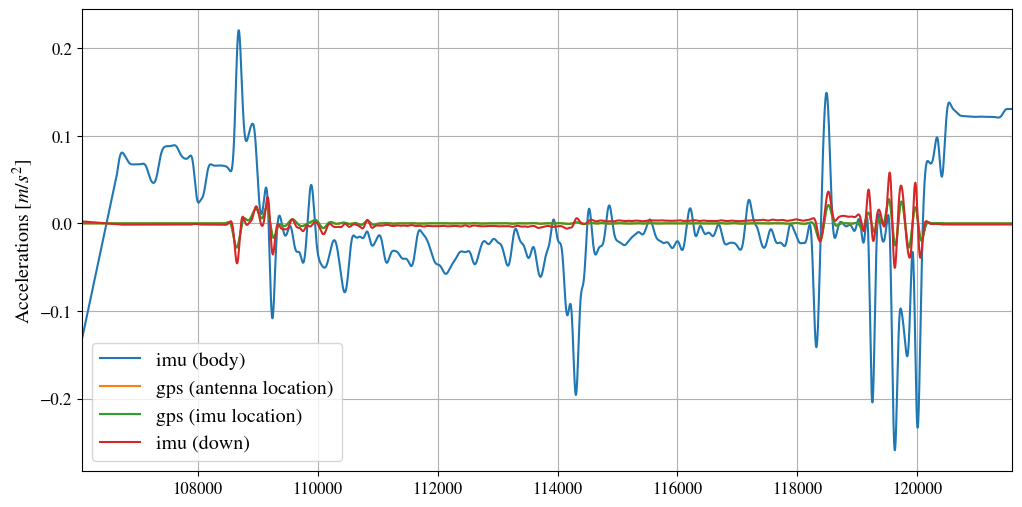

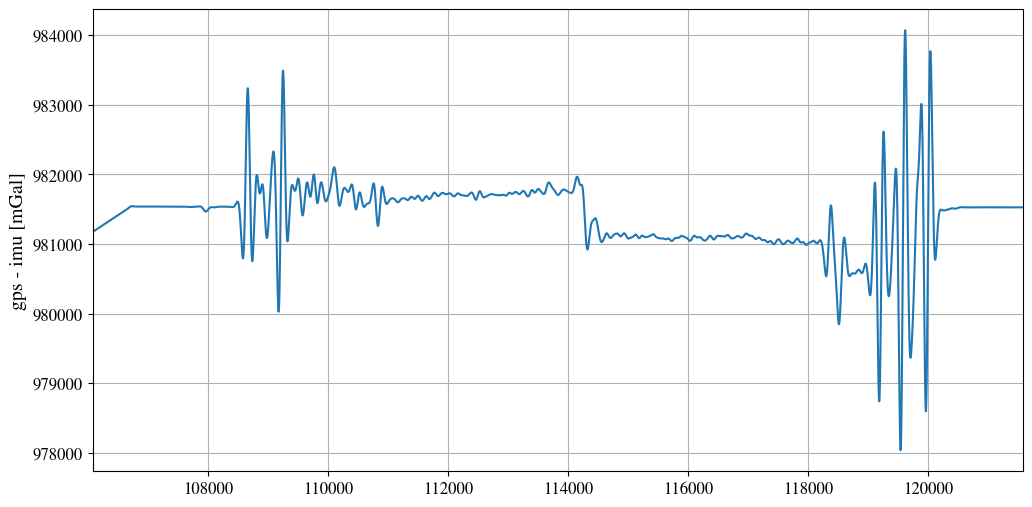

In [210]:
# Plot results 
fig = plt.figure(figsize=(N*2, N))
plt.plot(temp["time"], temp["imu_acc"]-np.mean(temp["imu_acc"]), label="imu (body)")
plt.plot(temp["time"], temp["gps_acc"], label="gps (antenna location)")
plt.plot(temp["time_cut"], temp["gps_acc2"], label="gps (imu location)")
plt.plot(temp["time_cut"], temp["imu_acc2"]-np.mean(temp["imu_acc2"]), label="imu (down)")
plt.xlim(temp["time"][0], temp["time"][-1])
plt.ylabel(r"Accelerations [$m/s^{2}$]")
plt.grid()
plt.legend(loc="lower left")
# plt.ylim(-0.1, 0.1)
plt.show()

fig = plt.figure(figsize=(N*2, N))
plt.plot(temp["time_cut"], (temp["gps_acc2"] - temp["imu_acc2"])*10**5)
plt.grid()
plt.xlim(temp["time_cut"][0], temp["time_cut"][-1])
plt.ylabel("gps - imu [mGal]")
plt.show()

In [211]:
print("Computing Transport-Rate (Eotvos and Coriolis) Effect")

vel = np.vstack([imu.vn.values, imu.ve.values, imu.vd.values]).T
pos = np.vstack([imu.lat.values, imu.lon.values, imu.h.values]).T

# Compute Transport Rate 
imu_tacc = ds.transport_rate_v2(imu.time, vel, pos)
temp["imu_tacc"] = imu_tacc

# Filter signal 
temp_trans = ds.but2_v2(temp["imu_tacc"][:,2], 3, ftc, 1/300)
temp["trans"] = temp_trans

# Interpolate 
temp["trans"] = ds.interpolate_DS(imu.time, temp["trans"], 
                               temp["time"], "linear", False, "extrapolate")
temp["trans"] = temp["trans"][:index]
# Correct for transport rate 
temp["imu_acc3"] = temp["imu_acc2"] - temp["trans"]

print("> Done")

Computing Transport-Rate (Eotvos and Coriolis) Effect
> Done


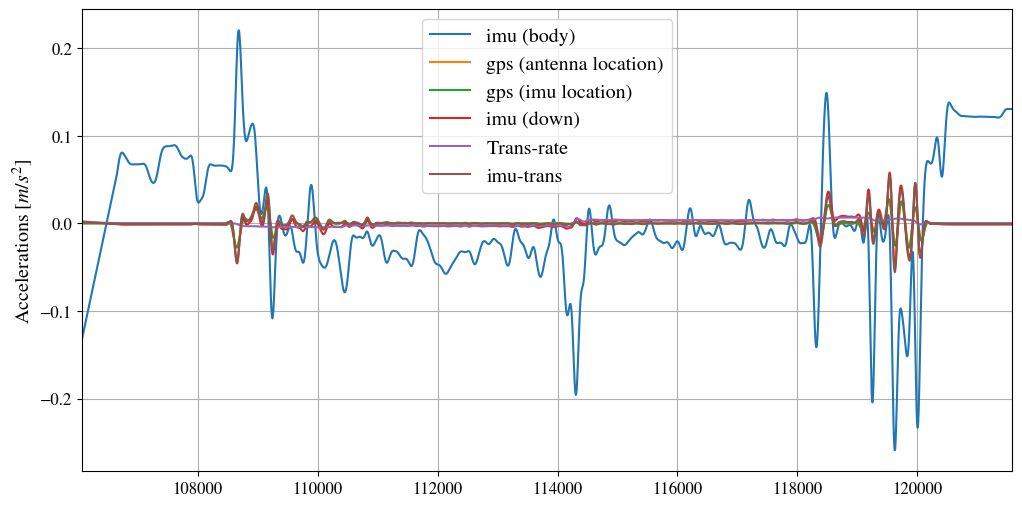

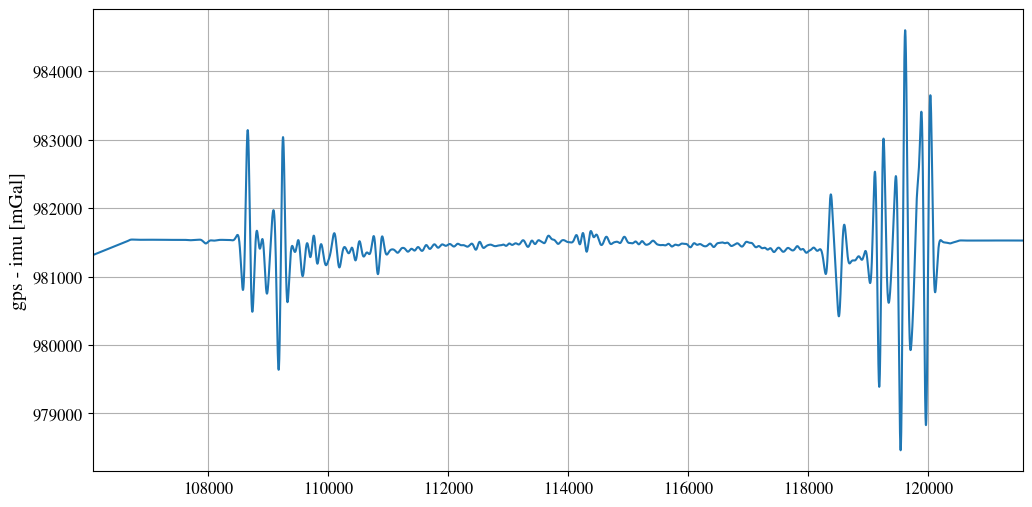

In [212]:
# Plot Results 
fig = plt.figure(figsize=(N*2, N))
plt.plot(temp["time"], temp["imu_acc"]-np.mean(temp["imu_acc"]), label="imu (body)")
plt.plot(temp["time"], temp["gps_acc"], label="gps (antenna location)")
plt.plot(temp["time_cut"], temp["gps_acc2"], label="gps (imu location)")
plt.plot(temp["time_cut"], temp["imu_acc2"]-np.mean(temp["imu_acc2"]), label="imu (down)")
plt.plot(temp["time_cut"], temp["trans"], label="Trans-rate")
plt.plot(temp["time_cut"], temp["imu_acc3"]-np.mean(temp["imu_acc3"]), label="imu-trans")
plt.xlim(temp["time"][0], temp["time"][-1])
plt.ylabel(r"Accelerations [$m/s^{2}$]")
plt.grid()
# plt.ylim(-0.1, 0.05)
plt.legend()

plt.show()

fig = plt.figure(figsize=(N*2, N))
plt.plot(temp["time_cut"], (temp["gps_acc2"] - temp["imu_acc3"])*10**5)
plt.grid()
plt.xlim(temp["time_cut"][0], temp["time_cut"][-1])
plt.ylabel("gps - imu [mGal]")
plt.show()

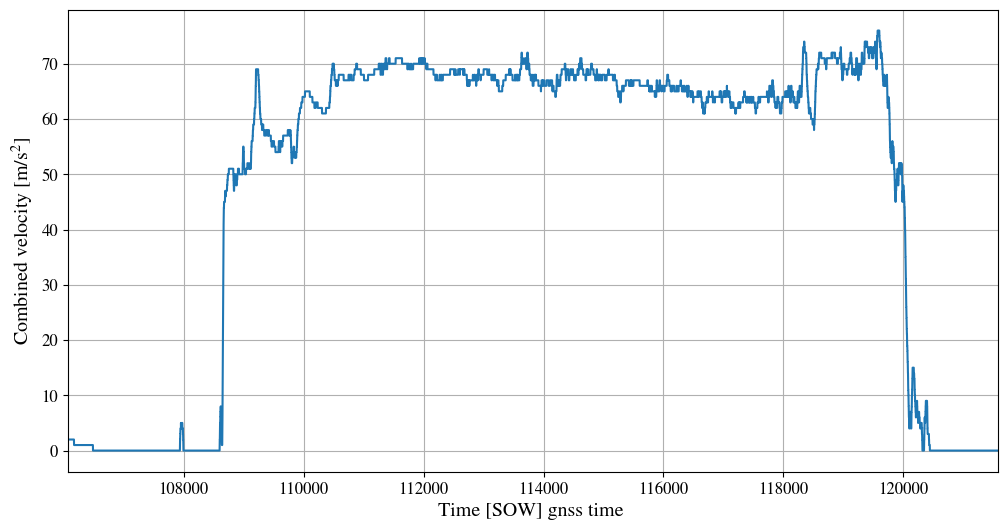

In [213]:
vel_dic = {}
vn_gnss = ds.interpolate_DS(nav.time, nav.vn, temp["time"], "linear", "extrapolate")
nav_key = ["vn", "ve", "vd"]
for i in range(0, len(nav_key)): 
    vel_dic[nav_key[i]] = ds.interpolate_DS(nav.time, nav[nav_key[i]], temp["time"],
                                             "linear", "extrapolate")

vel_scalar = np.round(np.sqrt(vel_dic["vn"]**2 + vel_dic["ve"]**2 + vel_dic["vd"]**2))

plt.show()
fig = plt.figure(figsize=(N*2, N))
plt.plot(temp["time"], vel_scalar)
plt.grid()
plt.xlim(temp["time"][0], temp["time"][-1])
plt.ylabel(r"Combined velocity [m/s$^2$]")
plt.xlabel("Time [SOW] gnss time ")
plt.show()


In [214]:
print("Deriving Gravity Acceleration")
@dataclass
class solution: 
    time: np.ndarray
    lat: np.ndarray
    lon: np.ndarray
    h: np.ndarray
    imu_acc: np.ndarray
    gps_acc: np.ndarray 
    gamma: np.ndarray

nav_key2 = ["lat", "lon", "h"]
for i in range(0, len(nav_key)): 
    temp[nav_key2[i]] = ds.interpolate_DS(nav.time, nav[nav_key2[i]], 
                                          temp["time"], "linear", "extrapolate")


solution = solution(temp["time_cut"],temp["lat"][:index],temp["lon"][:index],temp["h"][:index],
                    temp["imu_acc3"],temp["gps_acc2"], [])

gamma, _, _ = ds.normal_gravity_precise_v1(solution.lat.reshape(-1,1),solution.lon.reshape(-1,1),solution.h.reshape(-1,1), 3)
#gamma, _, _ = normal_gravity_precise_v1(solution.lat.reshape(-1,1),solution.lon.reshape(-1,1),solution.h.reshape(-1,1), 3)

solution.gamma = gamma.down

# Derive Gravity 
solution.g = solution.gps_acc - solution.imu_acc
solution.dg = (solution.g.reshape(-1,1) - solution.gamma)*10**5

print("> Done")

Deriving Gravity Acceleration
> Done


In [215]:
solution.imu_acc

array([-9.81314389, -9.81314741, -9.81315093, ..., -9.81527384,
       -9.81527384, -9.81527384])

In [216]:
dg_corr = ds.bias_drift_corr(solution.dg, solution.time, vel_scalar[:index])
#time_ref, dg_ref, idx = bias_drift_corr(solution.dg, solution.time, vel_scalar[:index])

Stationary time not suffiscient, additional start points included


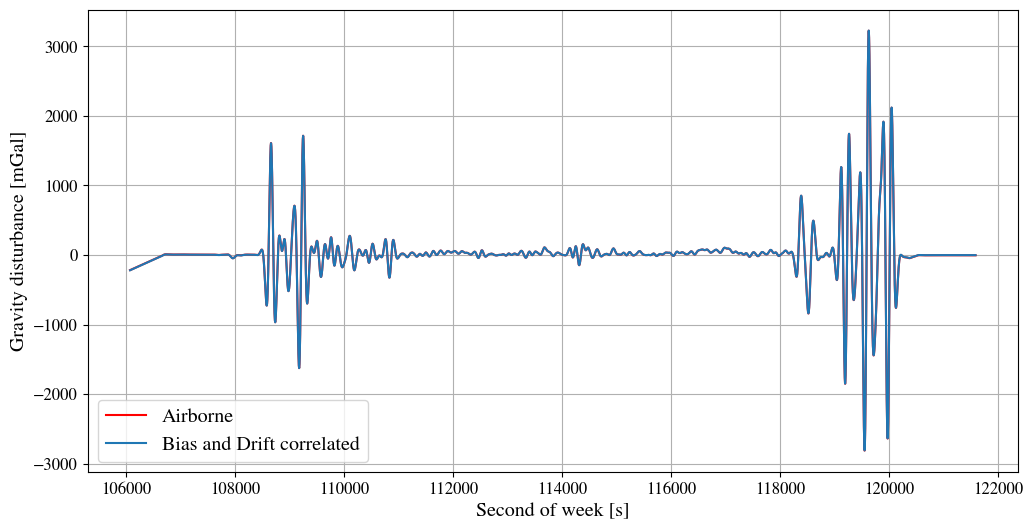

In [217]:
# Plot results...

fig = plt.figure(figsize=(N*2, N))

#plt.plot(egm08.time, egm08.dg, label="EGM08")
plt.plot(solution.time, solution.dg, label="Airborne", color="red")
plt.plot(solution.time, dg_corr, label="Bias and Drift correlated")
# plt.plot(gnss.time, gnss.freeAir_flight, label="Free Air Reference")
# plt.xlim(temp["time"][0], temp["time"][-1])
#plt.ylim(100, np.max(dg_corr))
plt.ylabel(r"Gravity disturbance [mGal]")
plt.xlabel("Second of week [s]")
plt.grid()
plt.legend(loc="lower left")
# plt.xlim(285000, 302500)

plt.show()

In [218]:
def echo(): 
    return print(".")
echo()

.


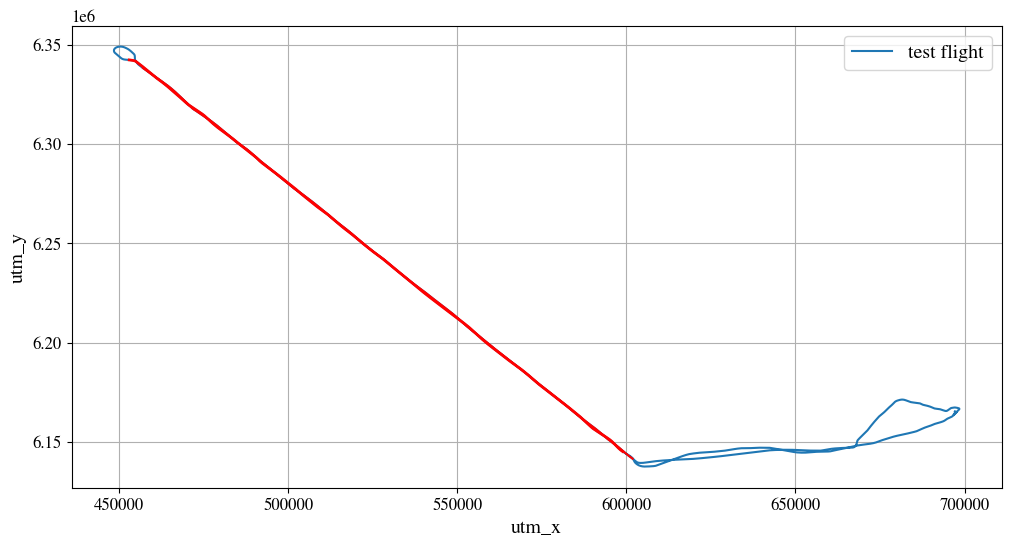

In [219]:
import pyproj
from pyproj import Transformer
survey = {}
survey["time"] = solution.time
survey["dg"] = solution.dg

pipeline = "+ellps=GRS80 +proj=pipeline +step +proj=utm +zone=32"
transform_object = Transformer.from_pipeline(pipeline)
geodetic_corr = [temp["lon"], temp["lat"], temp["h"]]
UTM_corr = transform_object.transform(*geodetic_corr)

# Used if gnss.time[::2]
fwd_start = 4500
fwd_end = 8100
bwd_start = 8450
bwd_end = 12200

# fwd_start = 18000
# fwd_end = 32400
# bwd_start = 33500
# bwd_end = 49000


fwd = np.zeros((len(np.arange(fwd_start,fwd_end)),2))
bwd = np.zeros((len(np.arange(bwd_start,bwd_end)),2))
fwd[:,0] = UTM_corr[0][fwd_start:fwd_end]; fwd[:,1] = UTM_corr[1][fwd_start:fwd_end]
bwd[:,0] = UTM_corr[0][bwd_start:bwd_end]; bwd[:,1] = UTM_corr[1][bwd_start:bwd_end]
survey["fwd"] = fwd
survey["bwd"] = bwd
survey["UTM"] = UTM_corr   #[Easting Northing, h]
survey["idx_orig"] = np.arange(0,len(UTM_corr[0]))
survey["fwd_idx"] = np.arange(fwd_start+1,fwd_end+1)
survey["bwd_idx"] = np.arange(bwd_start+1,bwd_end+1)
N = 6
fig = plt.figure(figsize=(N*2, N))
plt.plot(UTM_corr[0], UTM_corr[1], label="test flight")
plt.plot(UTM_corr[0][fwd_start:fwd_end], UTM_corr[1][fwd_start:fwd_end], linewidth=2, color="red")
plt.plot(UTM_corr[0][bwd_start:bwd_end], UTM_corr[1][bwd_start:bwd_end], color="red")
plt.ylabel("utm_y")
plt.xlabel("utm_x")
plt.grid()
plt.legend()

plt.show()



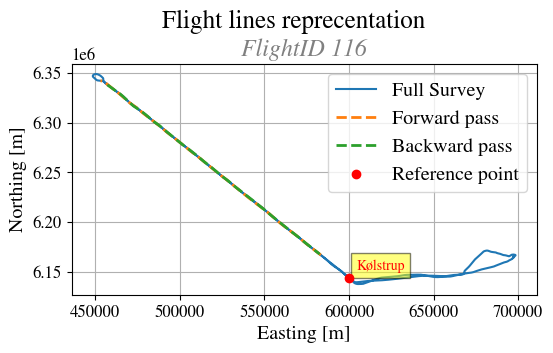

In [220]:
# Reference point
fors = [10.584149, 55.427809, 0]
UTM_fors = transform_object.transform(*fors)
survey["utm_ref"] = UTM_fors    # Reference point in UTM32 

# Based on DK2022 validation set, from Kølstrup forsamlingshus
fwd_min_dist = 28739.709081677258
fwd_max_dist = 256129.39367111248
bwd_min_dist = 29895.64523810463
bwd_max_dist = 256205.5882716447

dist_fwd = np.sqrt((survey["fwd"][:,0] - survey["utm_ref"][0])**2 
                   + (survey["fwd"][:,1] - survey["utm_ref"][1])**2)
survey["dist_fwd"] = dist_fwd
dist_bwd = np.sqrt((survey["bwd"][:,0] - survey["utm_ref"][0])**2 
                   + (survey["bwd"][:,1] - survey["utm_ref"][1])**2)
survey["dist_bwd"] = dist_bwd

idx_fwd = (survey["dist_fwd"] > fwd_min_dist) & (survey["dist_fwd"] < fwd_max_dist)
idx_bwd = (survey["dist_bwd"] > bwd_min_dist) & (survey["dist_bwd"] < bwd_max_dist)


survey["fwd_true"] = survey["fwd"][idx_fwd]
survey["bwd_true"] = survey["bwd"][idx_bwd]



fig = plt.figure(figsize=(N, N/2))
plt.plot(survey["UTM"][0], survey["UTM"][1], label="Full Survey")
plt.plot(survey["fwd_true"][:,0], survey["fwd_true"][:,1], label = "Forward pass", linewidth=2, linestyle="--")
plt.plot(survey["bwd_true"][:,0], survey["bwd_true"][:,1], label = "Backward pass", linewidth=2, linestyle="--")
plt.scatter(survey["utm_ref"][0], survey["utm_ref"][1], color="red", zorder=10, label = "Reference point")
plt.ylabel("Northing [m]")
plt.xlabel("Easting [m]")
plt.grid()
plt.legend()
plt.text(x=survey["utm_ref"][0]+4000,y=survey["utm_ref"][1]+9000,s=r"Kølstrup", 
    fontdict=dict(color="red",size=10),
    bbox=dict(facecolor="yellow",alpha=0.5))
plt.suptitle("Flight lines reprecentation \n", fontsize=18, y=1.06)
plt.title(r"FlightID 116", color="grey", style='italic')
plt.show()



In [221]:
type(gnss.time.values)
gnss.time.values.shape
survey["dg"].reshape(-1).shape

(15511,)

In [222]:
np.gradient(survey["time"])

array([1., 1., 1., ..., 1., 1., 1.])

In [223]:
dg_test = ds.but2_v2(survey["dg"].reshape(-1), 3, 240, 1)

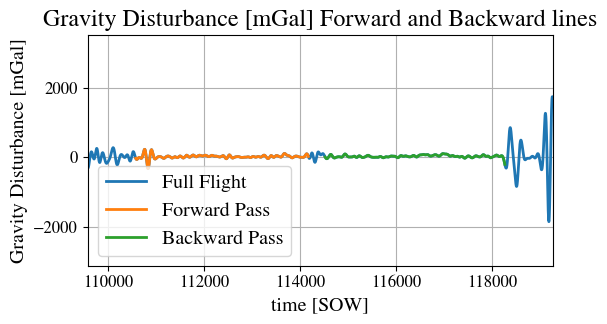

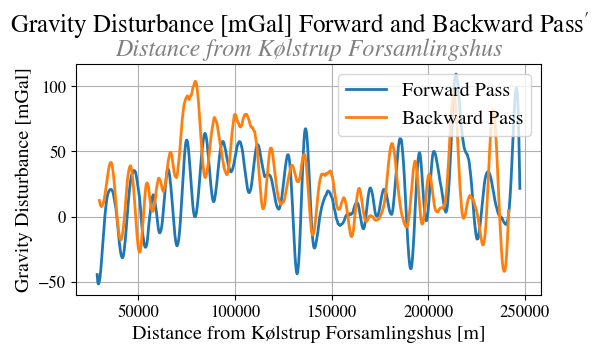

In [224]:
fig = plt.figure(figsize=(N, N/2))
plt.plot(survey["time"], survey["dg"], label="Full Flight",linewidth=2)
# plt.plot(survey["time"], dg_test, label="Full Flight",linewidth=2)

plt.plot(survey["time"][survey["fwd_idx"]], survey["dg"][survey["fwd_idx"]], label="Forward Pass", linewidth=2)
plt.plot(survey["time"][survey["bwd_idx"]], survey["dg"][survey["bwd_idx"]], label="Backward Pass", linewidth=2)
plt.ylabel("Gravity Disturbance [mGal]")
plt.xlabel("time [SOW]")
plt.xlim(survey["time"][survey["fwd_idx"][0]]-1000, survey["time"][survey["bwd_idx"][-1]]+1000)
#plt.ylim(120, 240)
plt.grid()
plt.legend(loc="lower left")
plt.title("Gravity Disturbance [mGal] Forward and Backward lines")
# plt.ylim(-60, 90)
plt.show()


fig = plt.figure(figsize=(N,N/2))
plt.plot(survey["dist_fwd"][idx_fwd].reshape(-1,1), survey["dg"][survey["fwd_idx"]][idx_fwd], label="Forward Pass", linewidth=2)
plt.plot(survey["dist_bwd"][idx_bwd].reshape(-1,1), survey["dg"][survey["bwd_idx"]][idx_bwd], label="Backward Pass", linewidth=2)
# plt.plot(survey["dist_fwd"][idx_fwd].reshape(-1,1), dg_test[survey["fwd_idx"]][idx_fwd], label="Forward Pass", linewidth=2)
# plt.plot(survey["dist_bwd"][idx_bwd].reshape(-1,1), dg_test[survey["bwd_idx"]][idx_bwd], label="Backward Pass", linewidth=2)

plt.ylabel("Gravity Disturbance [mGal]")
plt.xlabel(r"Distance from Kølstrup Forsamlingshus [m]")
plt.grid()
plt.legend(loc="upper right")
plt.suptitle("Gravity Disturbance [mGal] Forward and Backward Pass$\'$ \n", fontsize=18, y=1.06)
# Add title
plt.title(r"Distance from Kølstrup Forsamlingshus", color="grey", style='italic')
# plt.text(x=20000,y=131,s="Corr(fwd, bwd) = 0.88", 
#     fontdict=dict(color="red",size=10),
#     bbox=dict(facecolor="yellow",alpha=0.5))
plt.show()

In [252]:
survey["dist_bwd"][idx_bwd].shape

(3241,)

In [264]:
bwd_add_fwdPOS = ds.interpolate_DS(survey["dist_bwd"][idx_bwd], 
                                   survey["dg"][survey["bwd_idx"]][idx_bwd].reshape(-1), 
                                   survey["dist_fwd"][idx_fwd], 
                                   "linear", "extrapolate")

diff = survey["dg"][survey["fwd_idx"]][idx_fwd].reshape(-1) - bwd_add_fwdPOS
print(ds.RMS(diff))


34.43965739077611


In [225]:
file_res = Path("..", "data_Dk2022_new", "data", "results", "Ros16.txt")
TIM = pd.read_csv(file_res.as_posix(), skiprows=1, delim_whitespace=True, header = None, 
                  names = ["Time", "dg"])


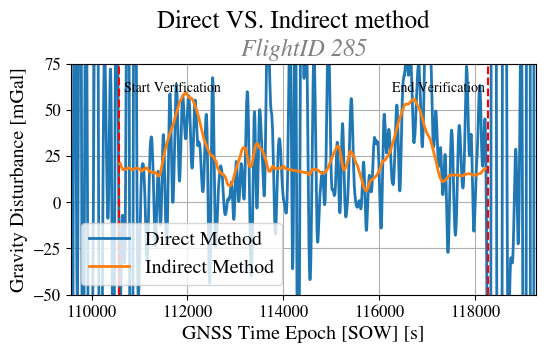

In [226]:
fig = plt.figure(figsize=(N, N/2))
plt.plot(survey["time"], survey["dg"], label="Direct Method",linewidth=2)
plt.plot(TIM.Time, TIM.dg, label="Indirect Method", linewidth=2)
plt.ylabel("Gravity Disturbance [mGal]")
plt.xlabel("GNSS Time Epoch [SOW] [s]")
plt.xlim(survey["time"][survey["fwd_idx"][0]]-1000, survey["time"][survey["bwd_idx"][-1]]+1000)
plt.ylim(-50, 75)
plt.grid()
plt.legend(loc="lower left")
plt.suptitle("Direct VS. Indirect method \n", fontsize=18, y=1.06)
plt.title(r"FlightID 285", color="grey", style='italic')
plt.axvline(x=survey["time"][survey["fwd_idx"][0]], color='red', linestyle="--")
plt.axvline(x=survey["time"][survey["bwd_idx"][-1]], color='red', linestyle="--")
plt.text(survey["time"][survey["fwd_idx"][0]]+100, 60, 'Start Verification', rotation=0)
plt.text(survey["time"][survey["bwd_idx"][-1]]-2000, 60, 'End Verification', rotation=0)

plt.show()

In [227]:
IS = ds.interpolate_DS(TIM.Time, TIM.dg, 
                                      survey["time"], "linear", "extrapolate")
res_DS2IS = IS.reshape(-1,1) - survey["dg"]


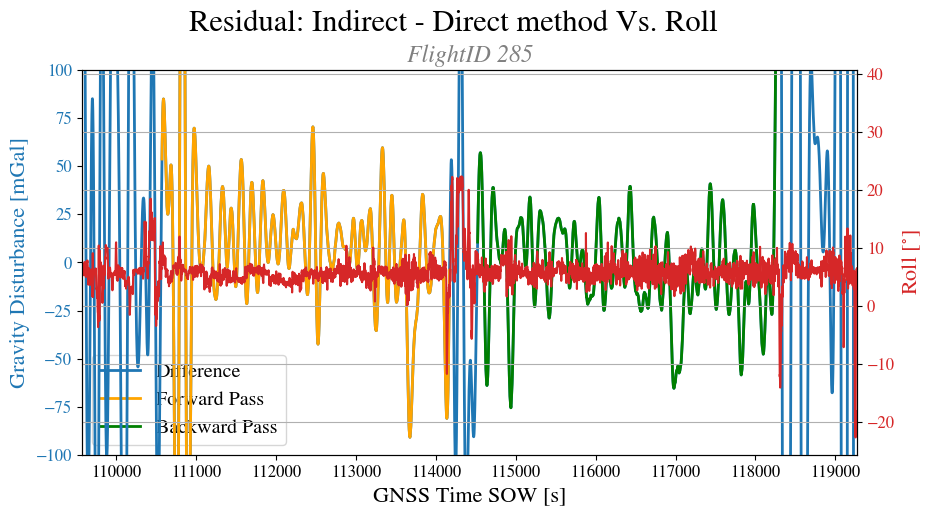

In [228]:
fig, ax1 = plt.subplots(figsize = (10,5))
color = "tab:blue"
ax1.set_xlabel("GNSS Time SOW [s]", fontsize=16)
ax1.plot(survey["time"], res_DS2IS, label="Difference",
         linewidth=2, color=color, zorder=10)
# ax1.plot(TIM.GPS_time, TIM.dg, label="Indirect Method", color="orange")
ax1.set_ylabel("Gravity Disturbance [mGal]", color=color, fontsize=16)
ax1.tick_params(axis='y', labelcolor=color)
ax1.plot(survey["time"][survey["fwd_idx"]], res_DS2IS[survey["fwd_idx"]], color="orange", zorder=100, label="Forward Pass", linewidth=2)
ax1.plot(survey["time"][survey["bwd_idx"]], res_DS2IS[survey["bwd_idx"]], color="green", zorder=100, label="Backward Pass", linewidth=2)
ax1.set_ylim(-100,100)
plt.legend()

# [survey["fwd_idx"]]

ax2 = ax1.twinx()
color = "tab:red"
ax2.plot(gnss.time, gnss.roll, label=r"Roll [$^{\circ}$]", color=color)
# ax2.plot(gnss.time, roll_but2, label=r"Roll [$^{\circ}$]", color=color)
ax2.set_ylabel("Roll [$^{\circ}$]", color=color, fontsize=16)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_xlim(survey["time"][survey["fwd_idx"][0]]-1000, survey["time"][survey["bwd_idx"][-1]]+1000)
ax2.grid()
ax2.locator_params(axis='x', nbins=10)
# plt.title("Difference (IS - DS) vs. Roll", fontsize=22)

plt.suptitle("Residual: Indirect - Direct method Vs. Roll \n", fontsize=22, y=1.0)
plt.title(r"FlightID 285", color="grey", style='italic')


# name = Path("Figures", "DS_IS_vs_roll.pdf")
# plt.savefig(name)
plt.show()

Mean of roll 5.902692049338123


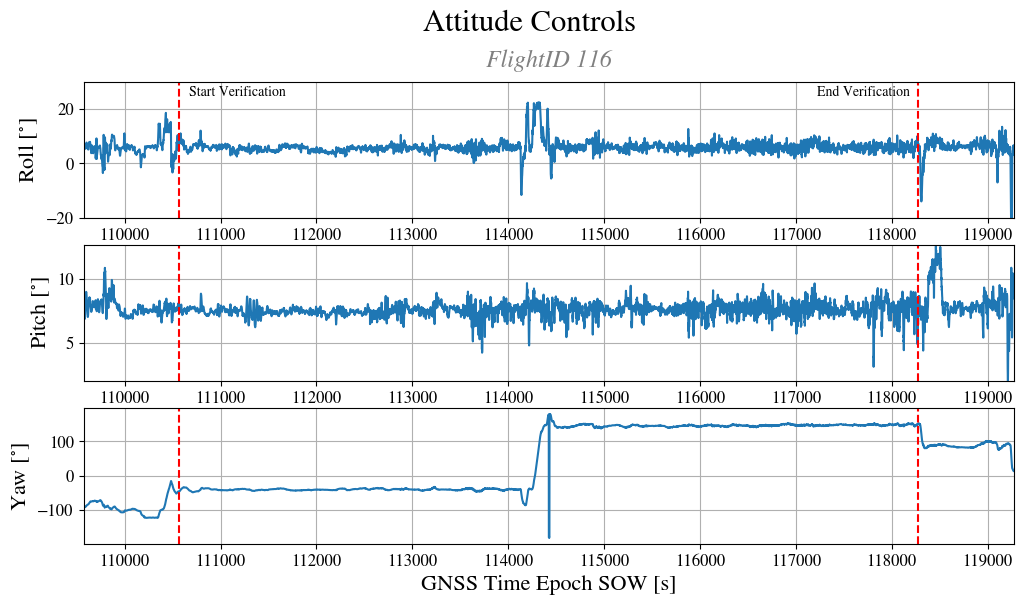

In [229]:
# fig = plt.figure(figsize=(N, N/2))
fig, ax = plt.subplots(3,1, figsize = (N*2,N)) 
ax[0].plot(gnss.time, gnss.roll, label="Roll")
# ax[0].plot(TIM.GPS_time, TIM.bank, label="TIM Roll")
ax[0].grid()
ax[0].set_ylabel(r"Roll [$^{\circ}$]", fontsize = 16)
# ax[0].legend(loc = "lower center")
ax[0].set_xlim(survey["time"][survey["fwd_idx"][0]]-1000, survey["time"][survey["bwd_idx"][-1]]+1000)

ax[1].plot(gnss.time, gnss.pitch, label= "Pitch")
# ax[1].plot(TIM.GPS_time, TIM.elevation, label="TIM Pitch")
ax[1].grid()
ax[1].set_ylabel(r"Pitch [$^{\circ}$]", fontsize = 16)
# ax[1].legend(loc = "lower center")
ax[1].set_xlim(survey["time"][survey["fwd_idx"][0]]-1000, survey["time"][survey["bwd_idx"][-1]]+1000)
# ax[1].set_xlim(294000, 296000)
# ax[1].set_ylim(-3,2)

ax[2].plot(gnss.time, gnss.yaw, label="Yaw")
# ax[2].plot(TIM.GPS_time, TIM.heading, label="TIM Yaw")
ax[2].grid()
ax[2].set_ylabel(r"Yaw [$^{\circ}$]", fontsize = 16)
ax[2].set_xlabel("GNSS Time Epoch SOW [s]", fontsize = 16)
# ax[2].legend(loc = "lower center")
ax[2].set_xlim(survey["time"][survey["fwd_idx"][0]]-1000, survey["time"][survey["bwd_idx"][-1]]+1000)
ax[0].axvline(x=survey["time"][survey["fwd_idx"][0]], color='red', linestyle="--")
ax[0].axvline(x=survey["time"][survey["bwd_idx"][-1]], color='red', linestyle="--")
ax[0].text(survey["time"][survey["fwd_idx"][0]]+100, 25, 'Start Verification', rotation=0)
ax[0].text(survey["time"][survey["bwd_idx"][-1]]-1050, 25, 'End Verification', rotation=0)
ax[1].axvline(x=survey["time"][survey["fwd_idx"][0]], color='red', linestyle="--")
ax[1].axvline(x=survey["time"][survey["bwd_idx"][-1]], color='red', linestyle="--")
ax[2].axvline(x=survey["time"][survey["fwd_idx"][0]], color='red', linestyle="--")
ax[2].axvline(x=survey["time"][survey["bwd_idx"][-1]], color='red', linestyle="--")
plt.suptitle("Attitude Controls \n", fontsize=22, y=1.0)
plt.title(r"FlightID 116", color="grey", style='italic', y=3.45)
ax[0].set_ylim(-20, 30)
ax[1].set_ylim(2, 12.7)
ax[0].locator_params(axis='x', nbins=10)
ax[1].locator_params(axis='x', nbins=10)
ax[2].locator_params(axis='x', nbins=10)

print("Mean of roll", np.mean(gnss.roll))

plt.show()

In [230]:
veri = np.hstack([survey["fwd_idx"], survey["bwd_idx"]])
print("mean of roll", np.mean(gnss.roll[veri]))
print("varianse of roll", np.var(gnss.roll[veri]))
print("std of roll", np.std(gnss.roll[veri]))

print("mean of pitch", np.mean(gnss.pitch[veri]))
print("varianse of pitch", np.var(gnss.pitch[veri]))
print("std of pitch", np.std(gnss.pitch[veri]))

# print("mean of yaw", np.mean(gnss.yaw[veri]))
# print("varianse of yaw", np.var(gnss.yaw[veri]))
# print("std of yaw", np.std(gnss.yaw[veri]))



mean of roll 5.722866491469683
varianse of roll 1.5199512179753514
std of roll 1.2328630167116506
mean of pitch 7.552846689828407
varianse of pitch 0.24747544538744642
std of pitch 0.4974690396270369


Text(0.5, 1.05, 'Attitude analysis, FlightID 116')

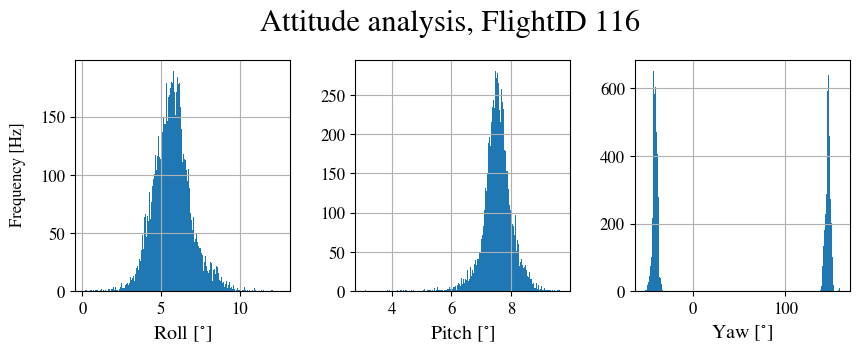

In [231]:
fig, ax = plt.subplots(1, 3, figsize=(10, 3))
ax[0].hist(gnss.roll[veri], bins = 200);
ax[0].grid()
ax[0].set_xlabel(r"Roll [$^{\circ}$]")

ax[1].hist(gnss.pitch[veri], bins = 200);
ax[1].grid()
ax[1].set_xlabel(r"Pitch [$^{\circ}$]")

ax[2].hist(gnss.yaw[veri], bins = 200);
ax[2].grid()
ax[2].set_xlabel(r"Yaw [$^{\circ}$]")

fig.text(0.06, 0.5, 'Frequency [Hz]', va='center', rotation='vertical', fontsize=12)
plt.subplots_adjust(wspace=0.3)
fig.suptitle("Attitude analysis, FlightID 116", fontsize=22, y=1.05)




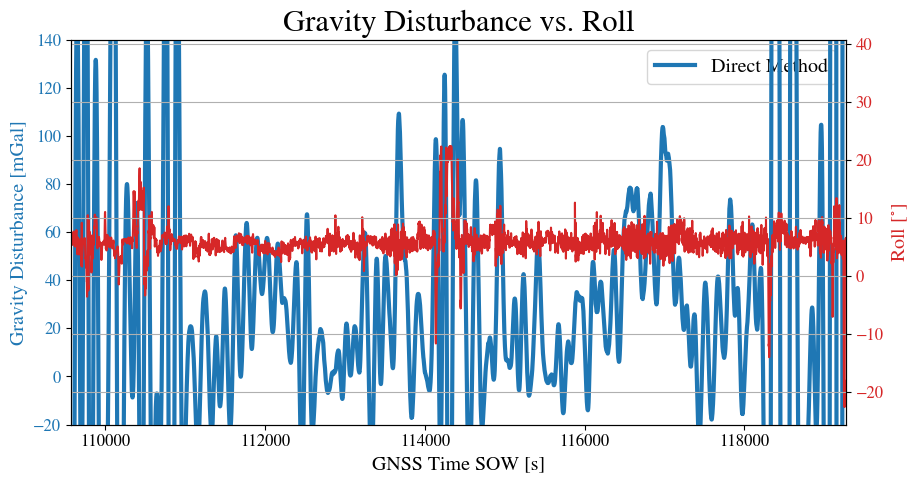

In [232]:
fig, ax1 = plt.subplots(figsize = (10,5))
color = "tab:blue"
ax1.set_xlabel("GNSS Time SOW [s]")
ax1.plot(survey["time"], survey["dg"], label="Direct Method",
         linewidth=3, color=color, zorder=10)
# ax1.plot(TIM.GPS_time, TIM.dg, label="Indirect Method", color="orange")
ax1.set_ylabel("Gravity Disturbance [mGal]", color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(-20, 140)
plt.legend()

ax2 = ax1.twinx()
color = "tab:red"
ax2.plot(gnss.time, gnss.roll, label=r"Roll [$^{\circ}$]", color=color, zorder=0)
ax2.set_ylabel("Roll [$^{\circ}$]", color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_xlim(survey["time"][survey["fwd_idx"][0]]-1000, survey["time"][survey["bwd_idx"][-1]]+1000)
ax2.grid()
plt.title("Gravity Disturbance vs. Roll", fontsize=22)
name = Path("Figures", "dg_vs_roll.pdf")
plt.savefig(name)
plt.show()

In [233]:
# fig = plt.figure(figsize=(N, N/2))
# plt.scatter(gnss.roll[survey["fwd_idx"]][idx_fwd], survey["dg"][survey["fwd_idx"]][idx_fwd])
# plt.ylabel("Gravity Disturbance")
# plt.xlabel("roll")